In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data =pd.read_csv("fit_curve.csv")
data.head()

Unnamed: 0  x    y
0           0  0  0.0
1           1  1  1.3
2           2  2  2.6
3           3  3  3.9
4           4  4  5.2

In [3]:
# se eliminan las columnas sin datos relevantes
data.drop("Unnamed: 0",1,inplace=True)
data.head()

<ipython-input-3-cea34396debb>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop("Unnamed: 0",1,inplace=True)


x    y
0  0  0.0
1  1  1.3
2  2  2.6
3  3  3.9
4  4  5.2

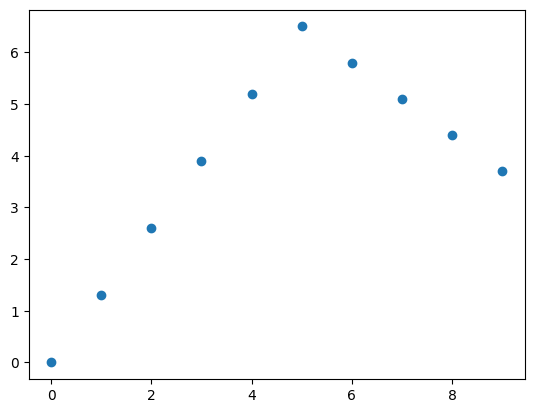

In [16]:
x=data["x"]
y=data["y"]
plt.scatter(x,y)

**a.**

In [22]:
def cuadratica(x,a,b,c):
  return a*x**2+b*x+c

def chi2(expected,data):
  return np.sum(np.square(data-expected))

In [32]:
popt,pcov = curve_fit(cuadratica,x,y)
popt

array([-0.18939394,  2.15606061, -0.45454545])

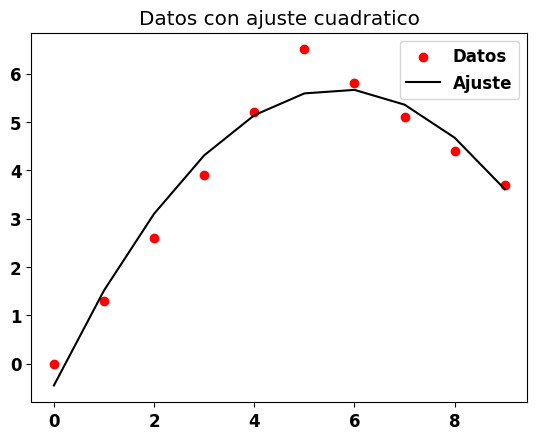

In [30]:
font = {'weight' : 'bold', 'size'   : 12}
plt.rc('font', **font)

plt.title("Datos con ajuste cuadratico")
plt.scatter(x,y,color="r",label="Datos")
plt.plot(x,cuadratica(x,popt[0],popt[1],popt[2]),color="k",label="Ajuste")
plt.legend()
plt.show()

In [46]:
print(f"El error para cada parámetro es:\n \
a {np.round(np.sqrt(pcov[0,0]),2)}\n\
 b {np.round(np.sqrt(pcov[1,1]),2)}\n\
 c {np.round(np.sqrt(pcov[2,2]),2)}.")

print(f"\n\nEl chi cuadrado para el ajuste cuadratico es: {np.round(chi2(cuadratica(x,popt[0],popt[1],popt[2]),y),2)}")

El error para cada parámetro es:
 a 0.02
 b 0.2
 c 0.38.


El chi cuadrado para el ajuste cuadratico es: 1.67


**b.**

In [48]:
def gaussiana(x,norm,mean,sigma):
  return norm*np.exp(-(x-mean)**2/(2*sigma**2))

popt,pcov = curve_fit(gaussiana,x,y)
popt

array([6.19486497, 5.74654967, 2.78281294])

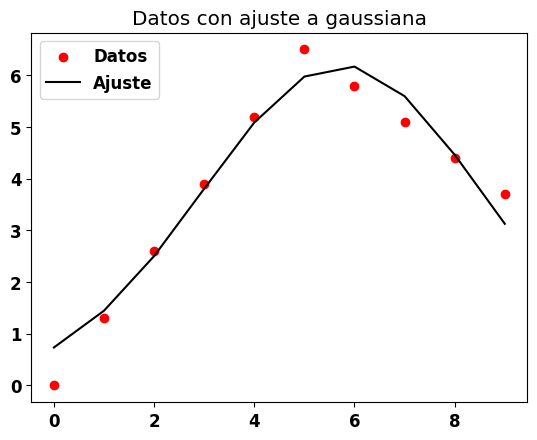

In [49]:
font = {'weight' : 'bold', 'size'   : 12}
plt.rc('font', **font)

plt.title("Datos con ajuste a gaussiana")
plt.scatter(x,y,color="r",label="Datos")
plt.plot(x,gaussiana(x,popt[0],popt[1],popt[2]),color="k",label="Ajuste")
plt.legend()
plt.show()

In [53]:
print(f"El error para cada parámetro es:\n \
norm {np.round(np.sqrt(pcov[0,0]),2)}\n\
 mean {np.round(np.sqrt(pcov[1,1]),2)}\n\
 sigma {np.round(np.sqrt(pcov[2,2]),2)}.")

print(f"\n\nEl chi cuadrado para el ajuste por gaussiana es: {np.round(chi2(gaussiana(x,popt[0],popt[1],popt[2]),y),2)}")

El error para cada parámetro es:
 norm 0.27
 mean 0.15
 sigma 0.18.


El chi cuadrado para el ajuste por gaussiana es: 1.58


**c.**

In [65]:
def gaussiana2(x,norm,mean,sigma,b):
  return x+b+norm*np.exp(-(x-mean)**2/(2*sigma**2))

popt,pcov = curve_fit(gaussiana2,x,y)
popt

array([ 1.11967437e+04,  3.05201964e+00,  1.71904063e+02, -1.11954339e+04])

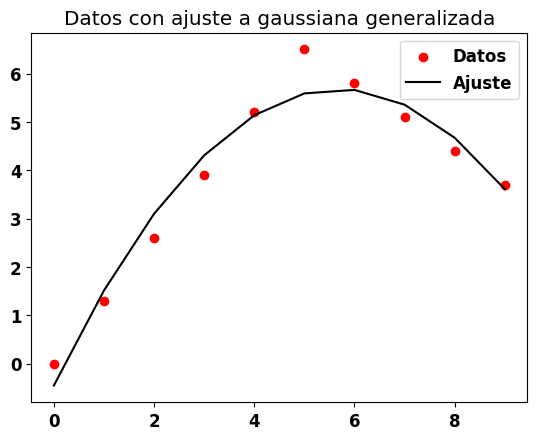

In [71]:
font = {'weight' : 'bold', 'size'   : 12}
plt.rc('font', **font)

plt.title("Datos con ajuste a gaussiana generalizada")
plt.scatter(x,y,color="r",label="Datos")
plt.plot(x,gaussiana2(x,popt[0],popt[1],popt[2],popt[3]),color="k",label="Ajuste")
plt.legend()
plt.show()

In [75]:
print(f"El error para cada parámetro es:\n\
 norm {np.round(np.sqrt(pcov[0,0]),2)}\n\
 mean {np.round(np.sqrt(pcov[1,1]),2)}\n\
 sigma {np.round(np.sqrt(pcov[2,2]),2)}\n\
 b {np.round(np.sqrt(pcov[3,3]),2)}")

print(f"\n\nEl chi cuadrado para el ajuste por gaussiana generalizada es: {np.round(chi2(gaussiana2(x,popt[0],popt[1],popt[2],popt[3]),y),2)}")

El error para cada parámetro es:
 norm 9411203.98
 mean 0.23
 sigma 72265.59
 b 9411204.07


El chi cuadrado para el ajuste por gaussiana generalizada es: 1.67
